In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
df_plot = pd.read_excel('GO_F1_plot.xlsx')

In [12]:
df_plot['-logp'] = -np.log(df_plot['Adjusted P-value'])

In [13]:
df_plot

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes,-logp
0,GO_Cellular_Component_2023,Vesicle (GO:0031982),21/235,5.139030e-07,0.000043,0,0,3.951047,57.216022,ABCA1;SERPINE2;ANXA2;AHNAK;ANXA4;GSTP1;ATP2B3;...,10.056080
1,GO_Molecular_Function_2023,Cadherin Binding (GO:0045296),19/319,4.591820e-04,0.039357,0,0,2.528067,19.430881,PTPN1;ANXA2;AHNAK;CEMIP2;PTPRM;PPFIBP1;ARVCF;C...,3.235092
2,GO_Molecular_Function_2023,Glutamate Receptor Binding (GO:0035254),4/18,8.936428e-04,0.041487,0,0,11.224654,78.799368,IGSF11;HIP1;NETO2;SHISA6,3.182373
3,GO_Molecular_Function_2023,Outward Rectifier Potassium Channel Activity (...,3/10,1.634778e-03,0.049861,0,0,16.809141,107.851619,KCND1;KCND2;KCNIP2,2.998522
4,GO_Cellular_Component_2023,Voltage-Gated Potassium Channel Complex (GO:00...,7/73,2.298445e-03,0.053366,0,0,4.180896,25.401129,KCND1;KCND2;KCNIP2;KCNIP3;KCNMB4;KCNA6;LRRC55,2.930577
5,GO_Molecular_Function_2023,Ionotropic Glutamate Receptor Binding (GO:0035...,3/11,2.206288e-03,0.055417,0,0,14.707243,89.956027,IGSF11;NETO2;SHISA6,2.892873
6,GO_Biological_Process_2023,Nervous System Development (GO:0007399),23/433,6.130941e-04,0.074894,0,0,2.245078,16.606828,FARP1;CHRM3;IGSF8;NRSN2;MARCKSL1;EGR2;UTP11;GS...,2.591678
7,GO_Cellular_Component_2023,Focal Adhesion (GO:0005925),19/387,4.221411e-03,0.078800,0,0,2.053625,11.228369,CYFIP1;CD151;AHNAK;ARPC1B;NME2;TRIOBP;PPFIBP1;...,2.540847
8,GO_Cellular_Component_2023,Potassium Channel Complex (GO:0034705),7/81,4.137868e-03,0.078800,0,0,3.727372,20.454234,KCND1;KCND2;KCNIP2;KCNIP3;KCNMB4;KCNA6;LRRC55,2.540847
9,GO_Biological_Process_2023,Regulation Of Cell Migration (GO:0030334),22/434,1.457055e-03,0.097022,0,0,2.132348,13.927083,CD151;NOTCH1;SERPINE2;SEMA4D;SEMA3D;HGF;STAT3;...,2.332820


In [39]:
norm = plt.Normalize(df_plot['Odds Ratio'].min(), df_plot['Odds Ratio'].max())
cb = plt.cm.ScalarMappable(cmap="mako", norm=norm)

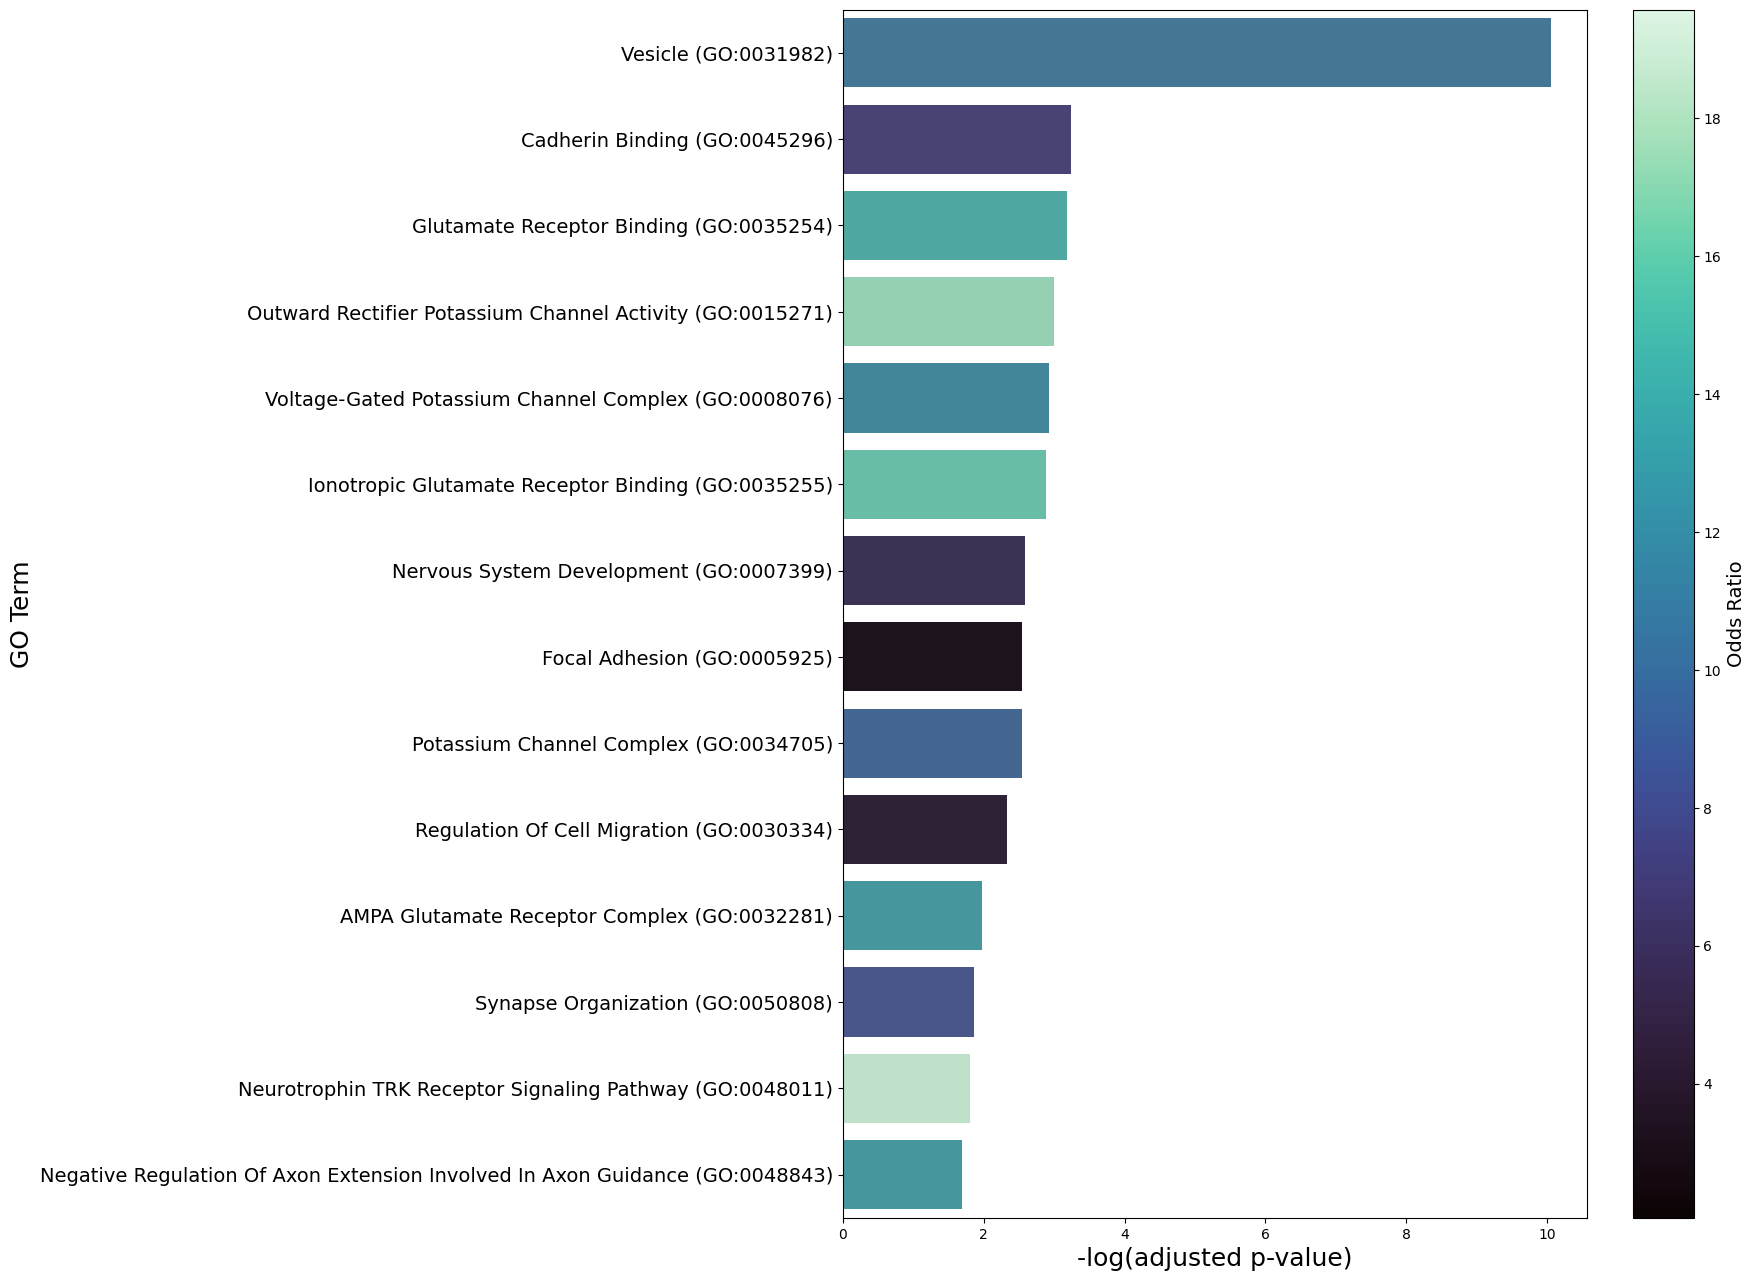

In [50]:
plt.figure(figsize=(12,16),dpi = 100)
ax = sns.barplot(df_plot,x = '-logp',y = 'Term',hue = 'Odds Ratio',palette = 'mako',dodge = False)
ax.get_legend().remove()
ax.set_ylabel('GO Term',size = 18)
ax.set_yticklabels(ax.get_yticklabels(),size=14)
ax.set_xlabel('-log(adjusted p-value)',size = 18)
ax.figure.colorbar(cb, ax=ax).set_label('Odds Ratio',size = 14)
plt.savefig('GO_barplot.pdf',bbox_inches="tight")

/Users/babyv/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


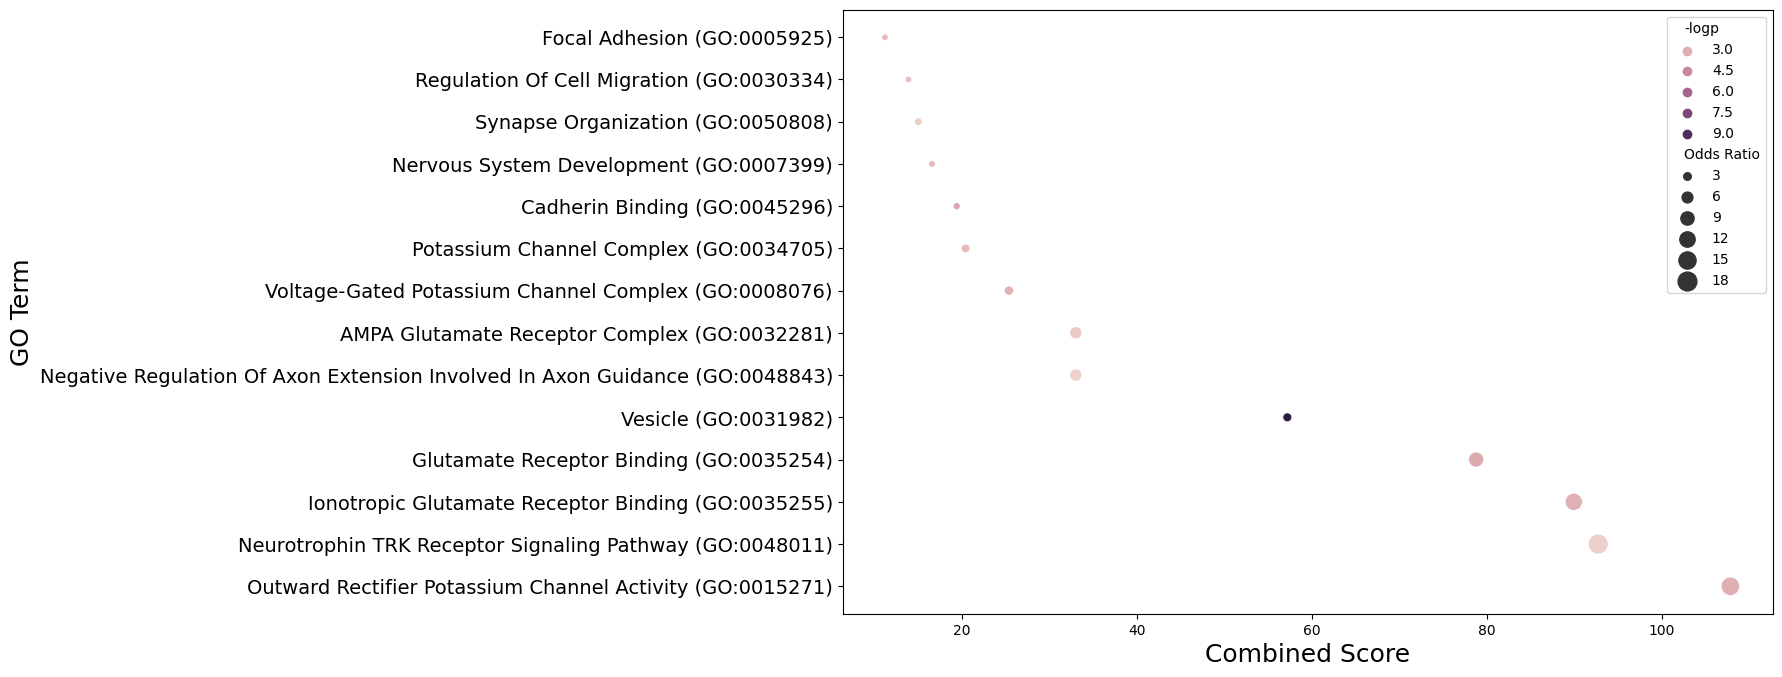

In [105]:
plt.figure(figsize=(12,8),dpi = 100)
ax = sns.scatterplot(df_plot.sort_values(by = 'Combined Score'),x = 'Combined Score',
                     y = 'Term',hue = '-logp',size = 'Odds Ratio',sizes=(20, 200),
                     palette = sns.cubehelix_palette(as_cmap=True))
ax.set_ylabel('GO Term',size = 18)
#ax.set_yticklabels(ax.get_yticklabels(),size=1)
ax.set_xlabel('Combined Score',size = 18)
ax.set_yticklabels(labels,size= 14)
plt.savefig('GO_scatterplot.pdf',bbox_inches="tight")

In [102]:
labels = df_plot.sort_values(by = 'Combined Score')['Term'].to_list()